# Setting Up

In [ ]:
# import python data analysis library numpy and pandas 
import pandas as pd
import numpy as np

# import data visualization library matplotlib and seaborn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager
import seaborn as sns
from seaborn.utils import relative_luminance

# import module to read files
import mimetypes
import urllib
import os

# import google colab to use google colab as editor
# if you use other editor, do not need to import google.colab here
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
## setting path
# get current path
path_current = os.getcwd()
# the path is where the dataset saved
path = path_current + '/drive/My Drive/RMIT/Visualization/Data/Bar/' 
# the "path_img" is the position where final image will be saved
path_img = path_current + '/drive/My Drive/RMIT/Visualization/Images/'

# Bar Class

In [140]:
class bar_chart:
    def __init__(self, y_series = '',  label_list = '', 
               x_series = ''):
      self.y_series = y_series
      self.x_series = x_series

    ## read file function: read three kinds of format file csv/excel/text
    # if you have other format of file, please change the function manually
    # file: str, filename (e.g.'Vertical_Bar.txt')
    def read_file(self,file):
      file_url = urllib.request.pathname2url(file)
      ftype = mimetypes.guess_type(file_url, strict = True)[0]

      ## read data file according to format, default file types: csv/excel/text
      # read csv format data
      if 'csv' in ftype:
          data = pd.read_csv(path + file)
      # read excel format data
      elif 'sheet' in ftype:
          data = pd.read_excel(path + file)
      # read text format data
      elif ftype == 'text/plain':
          data = pd.read_csv(path + file, sep="\t")
      else:
          print("Cannot read file, change file type.")
      return data

    def BarColor(self):
      ## create example figure
      fig = plt.figure(figsize = (conf['plotwidth'], conf['plotheight']))
      ax = fig.add_subplot(111)

      ## format ticks
      # MultipleLocator: locates ticks at a multiple of the number provided
      ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
      ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

      ## set the ticks position
      ax.xaxis.set_ticks_position('bottom')
      # {'top', 'bottom', 'both', 'default', 'none'}

      ## draw example bar plot
      for i in range(len(conf['colors'])):
          ax.bar(i, 3, color= conf['colors'][i], edgecolor='black')

      ## show color match
      plt.show()

    def BarPattern(self):
      ## create example figure
      fig = plt.figure(figsize = (conf['plotwidth'], conf['plotheight']))
      ax = fig.add_subplot(111)

      ## format ticks
      # MultipleLocator: locates ticks at a multiple of the number you provide
      ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
      ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

      ## set the ticks position
      ax.xaxis.set_ticks_position('bottom')
      # {'top', 'bottom', 'both', 'default', 'none'}

      ## draw example bar plot
      for i in range(len(conf['patterns'])):
          ax.bar(i, 3, color='white', edgecolor='black', hatch=conf['patterns'][i])

      ## show hatch patterns
      plt.show()

    def Bar(self, file,  x_col_name,  y_col_name, x_label, y_label,  paper_type, direction,  **kwargs):


             
      single_column_conf = {'isframe':False,
                  'type': 'single',
                  'title':'',
                  'title_pad':10,
                  'title_size':20,
                  'title_loc':'center',
                  'legend_label':'',
                  'plotwidth':10,
                  'plothight':6,
                  'line_width':1,
                  'valueformat':'{:.0f}',
                  'bar_width':0.8,
                  'xax_length':1,
                  'yax_length':1,
                  'valuepad':1,
                  'err_series':'',
                  'xtick_loc':1,
                  'ytick_loc':5,
                  'tick_labels':'',
                  'tick_direction':'out',
                  'fontfamily':'sans',
                  'axfont_size':17,
                  'valuefont_size':13,
                  'tickfont_size':13,
                  'legfont_size':14,
                  'labelpad':10,
                  'fontsize':18,
                  'legendcol':1,
                  'legend_loc':'upper right',
                  'gridline_width':0.2,
                  'colors':'1' * 50,
                  'bar_color':['#7173A9','#E8AA78','#E2918F','#629DDD',
                         '#A4BF7F','#A5D7D8','#A48BC1','#F4D470'],
                  'axis_color':'0',
                  'grid_color':'grey',
                  'edge_color':'0',
                  'font_color':'0',
                  'patterns':' ' * 50,
                  'bar_pattern':'0',
                  'eline_width':0.7,
                  'cap_size':0,
                  'cap_thick':1,
                  'is_save_fig':False,
                  'save_image':'bar.pdf',
                  'show_value':True}

      #double_column_conf                 
                  
      if paper_type == 'single':
        conf = single_column_conf
      elif paper_type == 'double':
        conf = double_column_conf 
    
      # when new configuraton is set, update the original one
      conf.update(kwargs)
                      
      # conf['err_series']              
  
      ## set font dictionary
      font_dict = {'family': conf['fontfamily'],
              'color': conf['font_color']}

      ## read file
      data = self.read_file(file)

      ## create figure and set figure size  
      fig, ax = plt.subplots(figsize = (conf['plotwidth'], conf['plothight']))


      ## add axes and format axes
      ax = fig.add_axes([0, 0, conf['xax_length'], conf['yax_length']])
      # The dimensions [left, bottom, width, height] of the new axes (range 0 to 1)
      # All quantities are in fractions of figure width and height.

      ## plot size changes according to figure size and the width,height of axes 
      
      if conf['type']=='single':

        ## draw vertical bar plot
        # edgecolor: The colors of the bar edges.
        # linewidth: Width of the bar edge(s). If 0, don't draw edges.
        # color: The colors of the bar faces. Default setting 'C0'.
        categories = []
        ticklabel_list = [0]
        for x, v in enumerate(list(data[x_col_name])):
          categories.append(x + 1.0)
          ticklabel_list.append(v)
        # choose the direction of bar: 'vertical' or 'horizontal'
        if direction == 'vertical':
          rectobj = ax.bar(x=categories, height=data[y_col_name], width=conf['bar_width'], 
                    data=data, label=conf['legend_label'],edgecolor=conf['edge_color'], 
                    linewidth=conf['line_width'], color=conf['bar_color'], hatch=conf['bar_pattern'])
        elif direction == 'horizontal':
          rectobj = ax.barh(y=data[y_col_name], height=conf['bar_width'], width=data[x_col_name], 
                    data=data, label=conf['legend_label'], edgecolor=conf['edge_color'], 
                    linewidth=conf['line_width'], color=conf['bar_color'], hatch=conf['bar_pattern'])

        ## format axes spines
        ## remove top and right spines
        ## set color of left and bottom axes spines
        # if False, top and right borders removing
        if conf['isframe'] == False:
          ax.spines['top'].set_visible(False)
          ax.spines['right'].set_visible(False)

        ## format ticks
        # MultipleLocator: locates ticks at a multiple of the number you provide
        ax.xaxis.set_major_locator(ticker.MultipleLocator(conf['xtick_loc']))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(conf['ytick_loc']))

        ## set x, y tick's direction, default:out, can be set to in,out,inout
        if conf['tick_direction'] == 'in':
          matplotlib.rcParams['xtick.direction'] = 'in'
          matplotlib.rcParams['ytick.direction'] = 'in'
        elif conf['tick_direction'] == 'inout':
          matplotlib.rcParams['xtick.direction'] = 'inout'
          matplotlib.rcParams['ytick.direction'] = 'inout'
        elif conf['tick_direction'] == 'out':
          matplotlib.rcParams['xtick.direction'] = 'out'
          matplotlib.rcParams['ytick.direction'] = 'out'

        ## format the tick color and tick labels
        # color: the color of ticks
        # labelsize: the font size of tick labels
        # labelcolor: the color of tick labels
        ax.tick_params(color = conf['axis_color'], labelsize = conf['tickfont_size'], labelcolor = conf['font_color'])
        
        if direction == 'vertical':
          if conf['tick_labels'] == '':
            ax.set_xticklabels(ticklabel_list)
          else:
            ax.set_xticklabels(conf['tick_labels'])
          ## add background grid
          ax.yaxis.grid(linestyle="--",color='gray', linewidth = conf['gridline_width'], alpha = 0.5)
          # alpha: adjust the transparency
        
        elif direction == 'horizontal':
          if conf['tick_labels']=='':
            ax.set_yticklabels(ticklabel_list)
          else:
            ax.set_yticklabels(conf['tick_labels'])
          ## add background grid
          ax.xaxis.grid(linestyle="--",color='gray', linewidth = conf['gridline_width'], alpha = 0.5) 
          # alpha: adjust the transparency

      elif conf['type']=='group':
        
        
        # number of groups
        

        if direction == 'vertical':      
          # set location of bars on x-axis
          # initialise list
          n_groups = len(y_col_name)
          xloc_list = [0]*n_groups
          xloc = np.arange(len(data[x_col_name]))
          for i in range(n_groups):
            xloc_list[i] = [x + i*conf['bar_width'] for x in xloc]

          rectobj_list = [0] * n_groups

          ## draw bars
          for i in range(n_groups):
              if conf['err_series'] == '':
                rectobj_list[i] = ax.bar(x=xloc_list[i], height=data[y_col_name[i]], width=conf['bar_width'],
                              color = conf['bar_color'][i], edgecolor = conf['edge_color'], 
                              linewidth = conf['line_width'],label = conf['legend_label'][i])
              else: 
                err =  data[conf['err_series'][i]].tolist()
                rectobj_list[i] = ax.bar(x=xloc_list[i], height=data[y_col_name[i]], width=conf['bar_width'], 
                              yerr=err, color=conf['bar_color'][i], 
                              edgecolor = conf['edge_color'], linewidth = conf['line_width'], 
                              label = conf['legend_label'][i], capsize = conf['cap_size'],
                              error_kw = {'elinewidth': conf['eline_width'], 'capthick': conf['eline_width']})

        elif direction == 'horizontal':  
          ## set locations for the bars on y axis
          # initialise list
          n_groups = len(x_col_name)
          yloc_list=[0]*n_groups
          yloc = np.arange(len(data[y_col_name]))
          for i in range(n_groups):
            yloc_list[i]=[y + i*conf['bar_width'] for y in yloc]

          rectobj_list = [0] * n_groups

          ## draw grouped bars 
          for i in range(n_groups):
              if conf['err_series']=='':
                rectobj_list[i] = ax.barh(y=yloc_list[i], height=conf['bar_width'], width=data[x_col_name[i]], 
                              color=conf['bar_color'][i], edgecolor=conf['edge_color'], linewidth=conf['line_width'], 
                              label=conf['legend_label'][i])    
              else: 
                err=data[conf['err_series'][i]].tolist()
                rectobj_list[i] = ax.barh(y=yloc_list[i], height=conf['bar_width'], width=data[x_col_name[i]], 
                              xerr = err, color = conf['bar_color'][i], edgecolor = conf['edge_color'], 
                              linewidth = conf['line_width'], label=conf['legend_label'][i],
                              capsize = conf['cap_size'], error_kw = {'elinewidth': conf['eline_width'],'capthick': conf['eline_width']})



        ## format axes spines
        ## remove top and right spines
        ## set color of left and bottom axes spines

        if conf['isframe'] == False:
          ax.spines['top'].set_visible(False)
          ax.spines['right'].set_visible(False)


        ## format ticks
        # MultipleLocator: locates ticks at a multiple of the number you provide
        ax.xaxis.set_major_locator(ticker.MultipleLocator(conf['xtick_loc']))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(conf['ytick_loc']))
        
        if direction == 'vertical':
          ## adjust the location of xticks label
          if conf['tick_labels'] == '':
            plt.xticks([x + conf['bar_width']*0.5*(n_groups-1) for x in range(len(data[x_col_name]))], data[x_col_name].tolist())
          else:  
            plt.xticks([x + conf['bar_width'] for x in range(n_groups)], conf['tick_labels'])
          ## format tick color and tick labels
          # color: the color of ticks
          # labelsize: the font size of tick labels
          # labelcolor: the color of tick labels
          ax.tick_params(color = conf['axis_color'], labelsize = conf['tickfont_size'], labelcolor = conf['font_color'])
          ## add background grid
          ax.yaxis.grid(linestyle="--",color='gray', linewidth = conf['gridline_width'], alpha = 0.5) # alpha: adjust the transparency          

        elif direction=='horizontal':
          ## format tick color and tick labels
          if conf['tick_labels'] == '':
            # adjust the location of yticks label
            plt.yticks([y + conf['bar_width']*0.5*(n_groups-1) for y in range(len(data[y_col_name]))], data[y_col_name].tolist())
          else: 
            # adjust the location of yticks label 
            plt.yticks([y + conf['bar_width']*0.5*(n_groups-1) for y in range(len(data[y_col_name]))], conf['tick_labels'])
          # color: the color of ticks
          # labelsize: the font size of tick labels
          # labelcolor: the color of tick labels
          ax.tick_params(color = conf['axis_color'], labelsize = conf['tickfont_size'], labelcolor = conf['font_color'])
          ## add background grid
          ax.xaxis.grid(linestyle="--",color='gray', linewidth = conf['gridline_width'], alpha = 0.5) # alpha: adjust the transparency
      
      elif conf['type']=='stack':
        if direction == 'vertical':
          n_groups = len(y_col_name)
          
          ## set locations for the bars on x axis(vertical bar)
          xloc = np.arange(len(data[x_col_name]))  

          bottom_value_list = [[0]] * n_groups
          rectobj_list = [0] * n_groups
          
          ## draw grouped bar plot
          for i in (range(n_groups)):
              if conf['err_series'] == '':
                  err = None
              else:
                  err = data[conf['err_series'][i]].tolist()
              if i == 0:
                  bottom_value_list[0] = 0 * n_groups
              else:
                  bottom_value_list[i] = np.array(bottom_value_list[i-1]) + np.array(data[y_col_name[i-1]])            

              rectobj_list[i] = ax.bar(x=xloc, height=data[y_col_name[i]], width=conf['bar_width'],
                            yerr=err, bottom=bottom_value_list[i], color=conf['bar_color'][i], 
                            edgecolor = conf['edge_color'], linewidth = conf['line_width'],
                            label = conf['legend_label'][i], capsize = conf['cap_size'],
                            error_kw = {'elinewidth': conf['eline_width'], 'capthick': conf['eline_width']})
        elif direction == 'horizontal':
          n_groups = len(x_col_name)
          
          ## set locations for the bars on y axis(horizontal bar)
          yloc = np.arange(len(data[y_col_name].tolist()))
          
          bottom_value_list = [[0]] * n_groups
          rectobj_list = [0] * n_groups
          ## draw grouped bar plot
          for i in (range(n_groups)):
              if conf['err_series'] == '':
                  err = None
              else:
                  err = data[conf['err_series'][i]].tolist()
              if i == 0:
                  bottom_value_list[0] = 0 * n_groups
              else:
                  bottom_value_list[i] = np.array(bottom_value_list[i-1]) + np.array(data[x_col_name[i-1]])            

              rectobj_list[i] = ax.barh(y=yloc, height=conf['bar_width'], width=data[x_col_name[i]], 
                            xerr=err, left=bottom_value_list[i], color=conf['bar_color'][i],  
                            edgecolor = conf['edge_color'], linewidth = conf['line_width'],
                            label = conf['legend_label'][i], capsize = conf['cap_size'],
                            error_kw = {'elinewidth': conf['eline_width'], 'capthick': conf['eline_width']})
        


        ## format ticks
        # MultipleLocator: locates ticks at a multiple of the number you provide
        ax.xaxis.set_major_locator(ticker.MultipleLocator(conf['xtick_loc']))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(conf['ytick_loc']))  

        ## set x, y tick's direction, default:out, can be set to in,out,inout
        if conf['tick_direction'] == 'in':
          matplotlib.rcParams['xtick.direction'] = 'in'
          matplotlib.rcParams['ytick.direction'] = 'in'
        elif conf['tick_direction'] == 'inout':
          matplotlib.rcParams['xtick.direction'] = 'inout'
          matplotlib.rcParams['ytick.direction'] = 'inout'
        elif conf['tick_direction'] == 'out':
          matplotlib.rcParams['xtick.direction'] = 'out'
          matplotlib.rcParams['ytick.direction'] = 'out'

        ## format the tick color and tick labels
        # color: the color of ticks
        # labelsize: the font size of tick labels
        # labelcolor: the color of tick labels
        ax.tick_params(color = conf['axis_color'], labelsize = conf['tickfont_size'], labelcolor = conf['font_color'])
        
        if direction == 'vertical':
          if conf['tick_labels'] == '':
            plt.xticks([x  for x in range(len(data[x_col_name]))], data[x_col_name].tolist())
          else:
            plt.xticks([x  for x in range(len(data[x_col_name]))], conf['tick_labels'])
          ## add background grid
          ax.yaxis.grid(linestyle="--",color='gray', linewidth = conf['gridline_width'], alpha = 0.5)
          # alpha: adjust the transparency
        
        elif direction == 'horizontal':
          if conf['tick_labels']=='':
            plt.yticks([y  for y in range(len(data[y_col_name]))], data[y_col_name].tolist())
          else:
            plt.yticks([y  for y in range(len(data[x_col_name]))], conf['tick_labels'])
          ## add background grid
          ax.xaxis.grid(linestyle="--",color='gray', linewidth = conf['gridline_width'], alpha = 0.5) 
          # alpha: adjust the transparency
      
      def autolabel(rects):

          if conf['err_series'] == '':
            if direction == 'vertical':
              ha='center'
              va='bottom'
            elif direction == 'horizontal':
              ha='left'
              va='center'
          else:
            if direction == 'vertical':
              ha='center'
              va='bottom'
            elif direction == 'horizontal':
              ha='left'
              va='top'            
          if direction == 'vertical':
            # Get y-axis height to calculate label position from.
            (y_bottom, y_top) = ax.get_ylim()
            y_height = y_top - y_bottom
            for rect in rects:
                height = rect.get_height()
                # Fraction of axis height taken up by this rectangle
                p_height = (height / y_height)
                # If we can fit the label above the column, do that;
                # otherwise, put it inside the column.

                label_position = height + (y_height * 0.01)

                ax.text(rect.get_x() + rect.get_width() / 2., label_position,
                      round(height, 2), ha=ha, va=va)
          else:
            # Get y-axis height to calculate label position from.
            (x_left, x_right) = ax.get_xlim()
            x_width = x_right - x_left
            for rect in rects:
                width = rect.get_width()
                # Fraction of axis height taken up by this rectangle
                p_width = (width / x_width)
                # If we can fit the label above the column, do that;
                # otherwise, put it inside the column.

                label_position = width + (x_width * 0.01)

                ax.text(label_position, rect.get_y() + rect.get_height()/2.,
                      round(width, 2),  ha=ha, va=va)

      ## format axes spines
      ## remove top and right spines
      ## set color of left and bottom axes spines
      # if False, top and right borders removing
      if conf['isframe'] == False:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
      
      if conf['show_value'] == True:     
        if conf['err_series'] == '':
          if  conf['type']=='single':
            autolabel(rectobj)
          else:  
            for i in range(n_groups):
              autolabel(rectobj_list[i])    
        else:
          for i in (range(n_groups)):
            if direction == 'vertical':
              autolabel(rectobj_list[i])
            elif direction == 'horizontal':
              autolabel(rectobj_list[i]) 
      
      ## format title
      if conf['title'] == '':
        pass
      else:
        ax.set_title(conf['title'], fontsize=conf['title_size'], loc=conf['title_loc'], pad=conf['title_pad']) 
            
             
      ## create legend
      # nocl:  integer, the number of columns that the legend has
      # fontsize: the font size of legend text
      # loc: str or pair of floats, the location of the legend (default 'best' or 0)
      plt.legend(ncol = conf['legendcol'], fontsize = conf['legfont_size'], loc = conf['legend_loc'])

      ## format x,y labels
      plt.xlabel(x_label, fontsize = conf['axfont_size'], labelpad = conf['labelpad'], color = conf['font_color'], fontdict=font_dict)
      plt.ylabel(y_label, fontsize = conf['axfont_size'], labelpad = conf['labelpad'], color = conf['font_color'], fontdict=font_dict)
      # labelpad: Spacing in points between the label and the x-axis

      ## save image as pdf to path folder
      # bbox in inches, only the given portion of the figure is saved,
      # figure out the tight bbox of the figure
      if conf['is_save_fig'] == True:
          plt.savefig(path_img + conf['save_image'], bbox_inches = 'tight')
      
      plt.show()



  


    


# Bar Chart Examples

## Basic Bar Chart

No handles with labels found to put in legend.


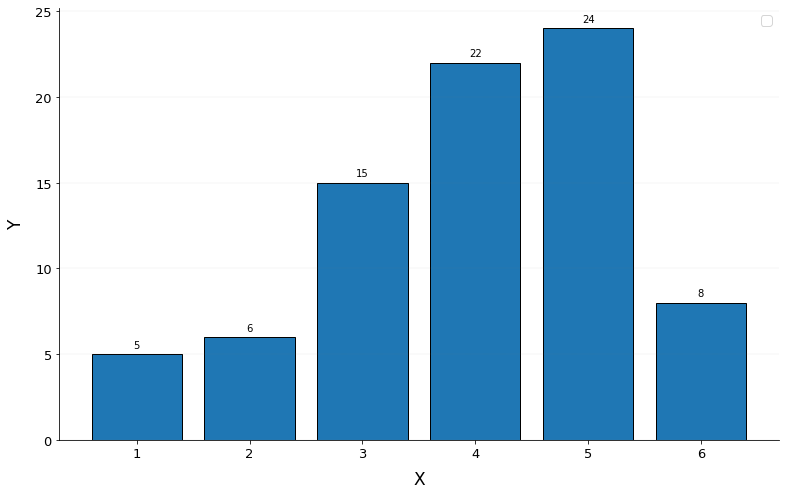

In [129]:
plot = bar_chart()
plot.Bar(file = 'Vertical_Bar.xlsx', direction = 'vertical', x_col_name = 'X', 
         y_col_name = 'Y', x_label = 'X', y_label = 'Y',  bar_color ='C0', 
         paper_type = 'single', group=False)

No handles with labels found to put in legend.


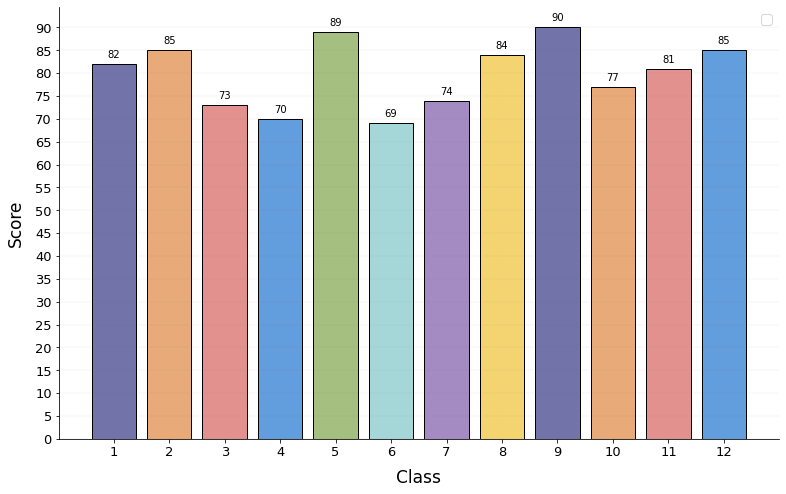

In [141]:
plot = bar_chart() 

plot.Bar(file ='Vertical_Bar_score.xlsx', direction = 'vertical', x_col_name = 'Class', 
         y_col_name = 'Score', x_label = 'Class', y_label = 'Score', 
         paper_type = 'single')

## Horizontal Bar Chart

No handles with labels found to put in legend.


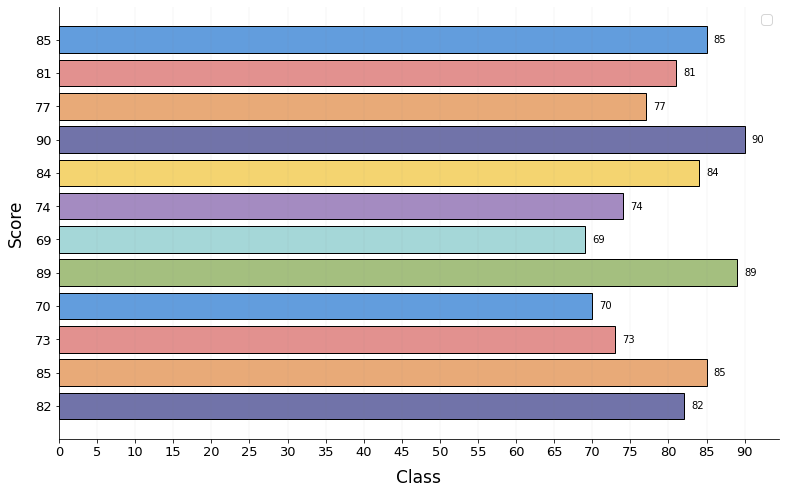

In [142]:
plot = bar_chart()

plot.Bar(file='Vertical_Bar_score.xlsx', direction='horizontal', x_col_name='Score',y_col_name='Class', 
         x_label='Class', y_label='Score', paper_type='single', xtick_loc=5, ytick_loc=1)

## Group Bar Chart

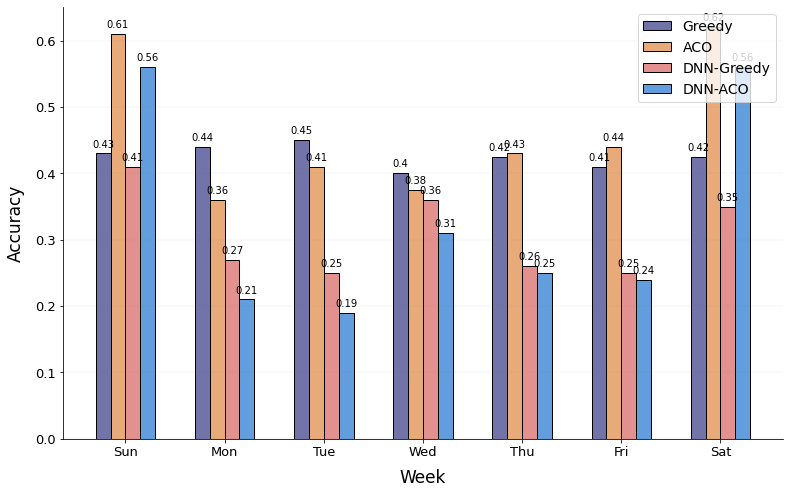

In [143]:
plot = bar_chart()

plot.Bar(file='Grouped_Bar.csv',bar_width= 0.15, direction = 'vertical',x_col_name = 'week', 
         y_col_name = ['Greedy','ACO','DNN-Greedy','DNN-ACO'], ytick_loc=0.1, x_label = 'Week', 
         y_label = 'Accuracy',  paper_type='single', type= 'group', group_name =['Greedy','ACO','DNN-Greedy','DNN-ACO'],
         legend_label=['Greedy','ACO','DNN-Greedy','DNN-ACO'])

## Group Horizontal Bar Chart

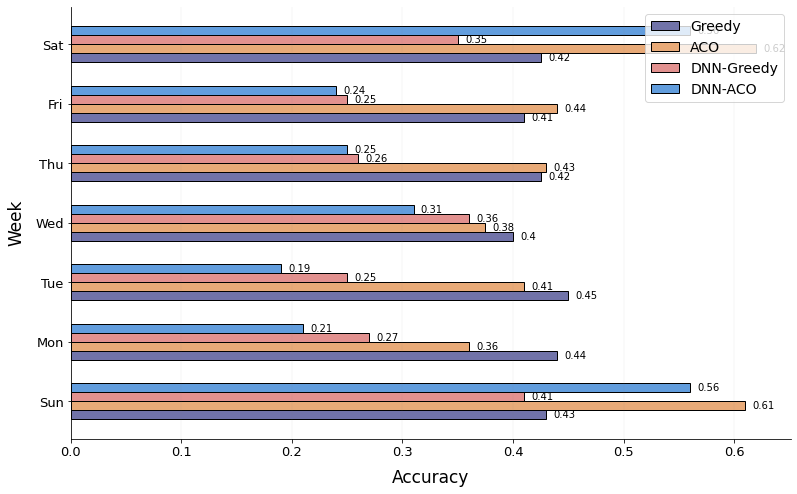

In [145]:
plot=bar_chart()
plot.Bar(file='Grouped_Bar.csv', bar_width=0.15, direction='horizontal', x_col_name=['Greedy','ACO','DNN-Greedy','DNN-ACO'], 
        y_col_name='week', xtick_loc=0.1, x_label='Accuracy', y_label='Week', paper_type='single', type= 'group',
        group_name =['Greedy','ACO','DNN-Greedy','DNN-ACO'], legend_label=['Greedy','ACO','DNN-Greedy','DNN-ACO'])

## Error Bar Chart 

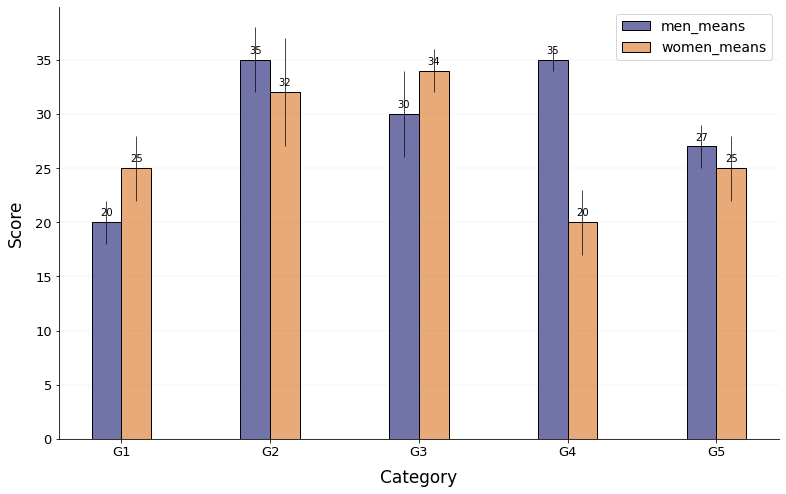

In [146]:
plot = bar_chart()
plot.Bar(file='Stacked_Bar.csv', bar_width=0.2, direction = 'vertical', x_col_name='Categories', y_col_name=['men_means','women_means'],   
      x_label='Category', y_label='Score', type= 'group', paper_type = 'single', group_name=['men_means','women_means'],
      legend_label=['men_means','women_means'],err_series=['men_std','women_std'])



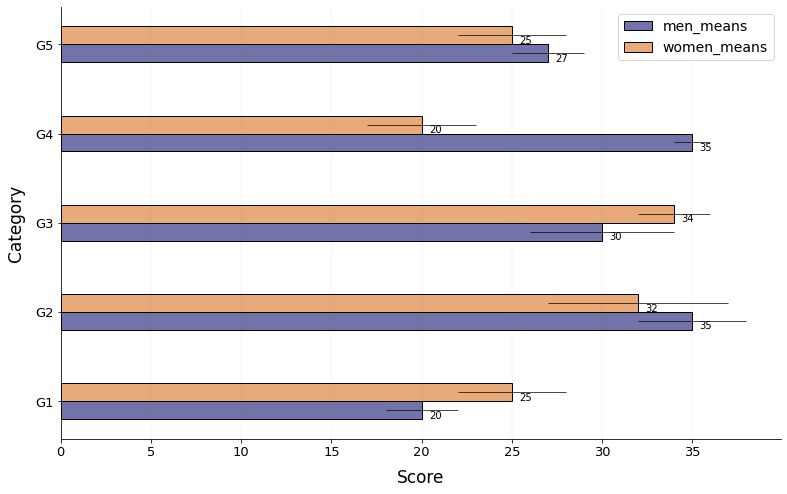

In [152]:
plot = bar_chart()
plot.Bar(file='Stacked_Bar.csv',  direction = 'horizontal', y_col_name='Categories', x_col_name=['men_means','women_means'],   
      y_label='Category', x_label='Score', type= 'group', paper_type = 'single', group_name=['men_means','women_means'],
         legend_label=['men_means','women_means'],err_series=['men_std','women_std'], bar_width=0.2, xtick_loc=5)


## Stack Bar Chart

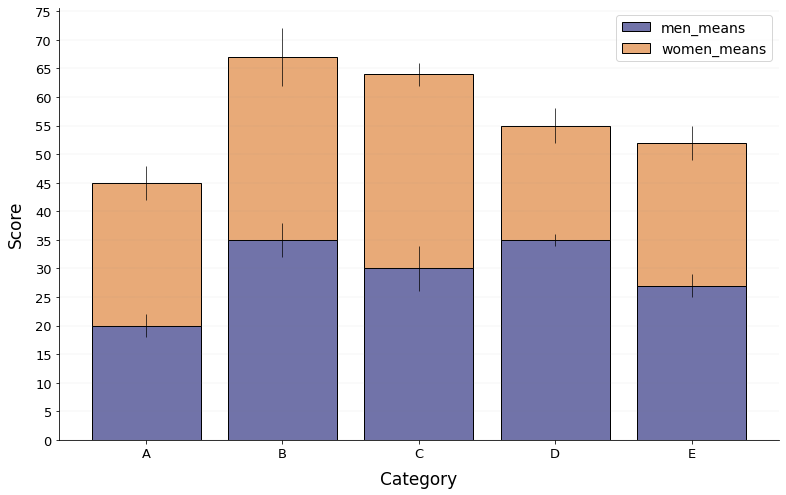

In [149]:
plot = bar_chart()
plot.Bar(file='Stacked_Bar.csv', direction = 'vertical', x_col_name='Categories', y_col_name=['men_means','women_means'],   
        x_label='Category', y_label='Score', type= 'stack', paper_type = 'single', group_name=['men_means','women_means'],
        legend_label=['men_means','women_means'],err_series=['men_std','women_std'],bar_type= 'stack',show_value=False, tick_labels=['A','B','C','D','E'])
 

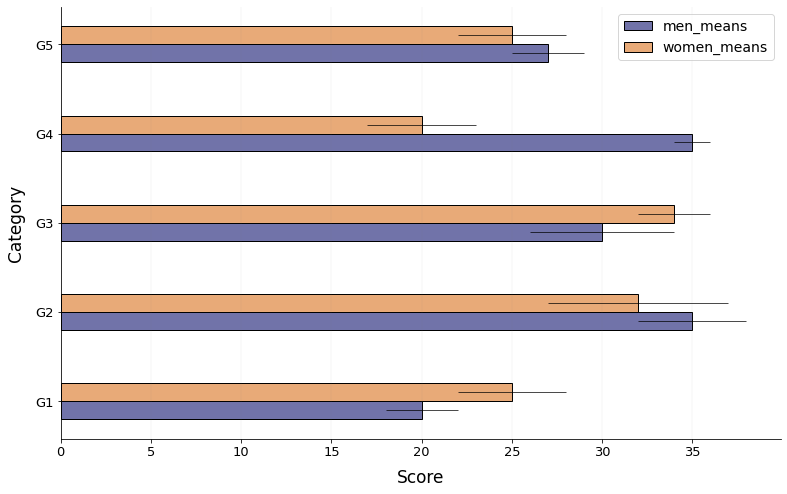

In [151]:
plot = bar_chart()
plot.Bar(file='Stacked_Bar.csv', direction = 'horizontal', y_col_name='Categories', x_col_name=['men_means','women_means'],   
        y_label='Category', x_label='Score', type= 'group', paper_type = 'single', group_name=['men_means','women_means'],
        legend_label=['men_means','women_means'],err_series=['men_std','women_std'],bar_type= 'stack',show_value=False,xtick_loc=5,ytick_loc=1,bar_width=0.2)
 